In [1]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_brokers"
]

In [2]:
sys.path += paths


In [3]:
# !pip install elasticsearch-dsl

In [4]:
# !pip install psycopg2-binary

In [5]:

from pandas.io import sql as psql

In [6]:
from lib.connected_db import PgsqlExecutor

In [7]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [8]:
db = PgsqlExecutor(research_db)


In [9]:
sql = """

select * from model.dcf_values where is_active = 1 and total_years = 5 order by symbol, fiscal_year, created desc 
"""
data = db.get_dataframe(sql)
data.head()


id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   fiscal_year pricingdate  total_years  market_dcf    dcf  adjusted_dcf  \
0         2004  2004-12-31            5        23.9    0.1           0.0   
1         2005  2005-12-31            5        31.4  165.1          69.3   
2         2006  2006-12-31            5        38.6  338.1          38.1   
3         2007  2007-12-31            5        44.7  320.6          43.7   
4         2008  2008-12-31            5        26.2  431.9         134.5   

  error                    created  
0       2020-06-13 02:28:03.388154  
1       2020-06-13 04:33:14.349904  
2       2020-06-13 02:27:57.251447  
3       2020-06-13 04:52:13.230892  
4       2020-06-13 02:27:51.389375

In [10]:
data.shape

(30192, 18)

In [11]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [12]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1) 
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)
data.loc[:, 'last_variance'] = shifted_by(data['variance'], 1) 
data.loc[:, 'last_adjust_growth'] = shifted_by(data['adjusted_growth_rate'], 1) 
data.loc[:, 'last_adjusted_dcf'] = shifted_by(data['adjusted_dcf'], 1)




In [13]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   ...                    created last_symbol  last_price  last_growth_rate  \
0  ... 2020-06-13 02:28:03.388154         NaN         NaN               NaN   
1  ... 2020-06-13 04:33:14.349904           A       24.10            -0.897   
2  ... 2020-06-13 02:27:57.251447           A       33.29             1.576   
3  ... 2020-06-13 04:52:13.230892           A       34.85             1.925   
4  ... 2020-06-13 02:27:51.389375           A       36.74             1.718   

   last_fiscal_year  last_market_dcf last_dcf last_variance  \
0               NaN              NaN      NaN           NaN   
1            2004.0             23.9      0.1          0.36   
2            2005.0             31.4    165.1          0.63   
3            2006.0             38.6    338.1          0.03   
4            2007.0             44.7    320.6          0.03   

  last_adjust_growth  last_adjusted_dcf  
0                NaN                NaN  
1             -1.470                0.0  
2              0.986               69.3  
3              0.064               38.1  
4              0.045               43.7  

[5 rows x 27 columns]

In [14]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["adjusted_dcf_to_price"] = (data["last_adjusted_dcf"] - data["last_price"]) * 100 / data["last_price"]




In [15]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   68991      A           NYSE        2587460          1          24.10   
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
0               0.095               -0.897                -1.470      0.36   
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   

   ...  price_change direction  correct  fiscal_change  growth_changes  \
0  ...           NaN        -1    False            NaN             NaN   
1  ...          9.19         1     True            1.0           2.473   
2  ...          1.56         1     True            1.0           0.349   
3  ...          1.89         1     True            1.0          -0.207   
4  ...        -21.11        -1     True            1.0           0.156   

   market_dcf_change  dcf_change dcf_to_price market_dcf_to_price  \
0                NaN         NaN          NaN                 NaN   
1          31.120332  684.647303   -99.585062           -0.829876   
2          21.628117  519.675578   395.944728           -5.677381   
3          17.503587  -50.215208   870.157819           10.760402   
4         -50.353838  302.939575   772.618400           21.665759   

   adjusted_dcf_to_price  
0                    NaN  
1            -100.000000  
2             108.170622  
3               9.325681  
4              18.943930  

[5 rows x 37 columns]

In [16]:
data = data.iloc[1:, :]
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
1  102649      A           NYSE        2587460          1          33.29   
2   68976      A           NYSE        2587460          1          34.85   
3  108033      A           NYSE        2587460          1          36.74   
4   68964      A           NYSE        2587460          1          15.63   
5  112575      A           NYSE        2587460          1          31.07   

   market_growth_rate  current_growth_rate  adjusted_growth_rate  variance  \
1               0.095                1.576                 0.986      0.63   
2               0.095                1.925                 0.064      0.03   
3               0.095                1.718                 0.045      0.03   
4               0.095                1.874                 1.148      0.61   
5               0.095               -0.084                -0.167      0.00   

   ...  price_change direction  correct  fiscal_change  growth_changes  \
1  ...          9.19         1     True            1.0           2.473   
2  ...          1.56         1     True            1.0           0.349   
3  ...          1.89         1     True            1.0          -0.207   
4  ...        -21.11        -1     True            1.0           0.156   
5  ...         15.44         1     True            1.0          -1.958   

   market_dcf_change   dcf_change dcf_to_price market_dcf_to_price  \
1          31.120332   684.647303   -99.585062           -0.829876   
2          21.628117   519.675578   395.944728           -5.677381   
3          17.503587   -50.215208   870.157819           10.760402   
4         -50.353838   302.939575   772.618400           21.665759   
5          90.850928 -2074.216251  2663.275752           67.626360   

   adjusted_dcf_to_price  
1            -100.000000  
2             108.170622  
3               9.325681  
4              18.943930  
5             760.524632  

[5 rows x 37 columns]

In [17]:
import copy

In [18]:
new_data = copy.deepcopy(data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)&(data["total_years"] == 5)])

In [19]:
new_data.dropna()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
1      102649      A           NYSE        2587460          1         33.290   
2       68976      A           NYSE        2587460          1         34.850   
3      108033      A           NYSE        2587460          1         36.740   
4       68964      A           NYSE        2587460          1         15.630   
5      112575      A           NYSE        2587460          1         31.070   
...       ...    ...            ...            ...        ...            ...   
30187   66594   ZYXI       NasdaqCM       46573447          1          0.453   
30188   37979   ZYXI       NasdaqCM       46573447          1          0.300   
30189   68659   ZYXI       NasdaqCM       46573447          1          3.180   
30190   40850   ZYXI       NasdaqCM       46573447          1          2.940   
30191   75362   ZYXI       NasdaqCM       46573447          1          7.870   

       market_growth_rate  current_growth_rate  adjusted_growth_rate  \
1                   0.095                1.576                 0.986   
2                   0.095                1.925                 0.064   
3                   0.095                1.718                 0.045   
4                   0.095                1.874                 1.148   
5                   0.095               -0.084                -0.167   
...                   ...                  ...                   ...   
30187               0.095                0.896                 0.034   
30188               0.095                0.872                 0.004   
30189               0.095                1.713                 0.396   
30190               0.095                0.427                 0.155   
30191               0.095                0.389                 0.078   

       variance  ...  price_change direction  correct  fiscal_change  \
1          0.63  ...         9.190         1     True            1.0   
2          0.03  ...         1.560         1     True            1.0   
3          0.03  ...         1.890         1     True            1.0   
4          0.61  ...       -21.110        -1     True            1.0   
5          0.00  ...        15.440         1     True            1.0   
...         ...  ...           ...       ...      ...            ...   
30187      0.04  ...         0.288         1     True            1.0   
30188      0.00  ...        -0.153        -1     True            1.0   
30189      0.23  ...         2.880         1     True            1.0   
30190      0.36  ...        -0.240        -1     True            1.0   
30191      0.20  ...         4.930         1     True            1.0   

       growth_changes  market_dcf_change   dcf_change dcf_to_price  \
1               2.473          31.120332   684.647303   -99.585062   
2               0.349          21.628117   519.675578   395.944728   
3              -0.207          17.503587   -50.215208   870.157819   
4               0.156         -50.353838   302.939575   772.618400   
5              -1.958          90.850928 -2074.216251  2663.275752   
...               ...                ...          ...          ...   
30187          -0.168         303.030303  -181.818182  2021.212121   
30188          -0.024         -22.075055   -44.150110   606.401766   
30189           0.841        1000.000000  8733.333333   900.000000   
30190          -1.286          -6.289308  -761.006289   818.238994   
30191          -0.038         163.265306   142.857143    70.068027   

      market_dcf_to_price  adjusted_dcf_to_price  
1               -0.829876            -100.000000  
2               -5.677381             108.170622  
3               10.760402               9.325681  
4               21.665759              18.943930  
5               67.626360             760.524632  
...                   ...                    ...  
30187           81.818182             263.636364  
30188           76.600442              54.525386  
30189          133.3

In [20]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]



In [21]:
## increase the value of growth rate to 100
new_data['last_growth_rate'] = new_data['last_growth_rate'] * 100
new_data['last_adjust_growth'] = new_data['last_adjust_growth'] * 100
new_data['last_variance'] = new_data['last_variance'] * 100




In [22]:
new_data[['last_growth_rate', 'last_adjust_growth', 'last_variance']].head()

last_growth_rate  last_adjust_growth  last_variance
1             -89.7              -147.0           36.0
2             157.6                98.6           63.0
3             192.5                 6.4            3.0
4             171.8                 4.5            3.0
5             187.4               114.8           61.0

In [23]:
new_data["last_variance"].describe()

count    23757.000000
mean        25.377783
std         22.416031
min          0.000000
25%          5.000000
50%         18.000000
75%         46.000000
max         70.000000
Name: last_variance, dtype: float64

(array([2727., 1694., 1552.,  855., 1632., 1039.,  807.,  347.,  613.,
         586.,  532.,  219.,  450.,  437.,  445.,  209.,  418.,  418.,
         408.,  218.,  380.,  372.,  354.,  209.,  392.,  396.,  403.,
         193.,  400.,  429.,  443.,  241.,  565.,  678.,  864.,  271.,
         490.,  443.,  363.,  265.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

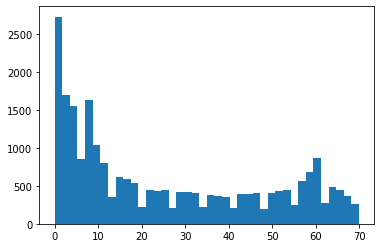

In [24]:
import matplotlib.pyplot as plt

plt.hist(new_data["last_variance"].values, bins=40)

In [25]:
new_data[new_data["price_change_perf"] > 30]["last_variance"].describe()

count    6000.000000
mean       25.864833
std        22.507762
min         0.000000
25%         6.000000
50%        19.000000
75%        47.000000
max        70.000000
Name: last_variance, dtype: float64

(array([668., 436., 376., 211., 395., 257., 191.,  92., 155., 137., 129.,
         61., 135., 123., 117.,  46.,  90., 113.,  92.,  50., 103., 113.,
         90.,  49.,  89., 101., 109.,  57.,  96.,  97., 122.,  73., 139.,
        189., 229.,  73., 120., 119.,  96.,  62.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

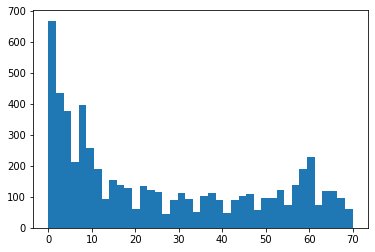

In [26]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] > 30]["last_variance"].values, bins=40)

(array([552., 334., 330., 192., 352., 199., 157.,  75., 134., 131., 103.,
         44.,  82.,  90., 101.,  41.,  90.,  92.,  90.,  54.,  72.,  74.,
         69.,  41.,  81., 102.,  84.,  37.,  97.,  95., 100.,  51., 119.,
        166., 204.,  57., 103.,  90.,  68.,  50.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  , 36.75, 38.5 , 40.25, 42.  , 43.75, 45.5 ,
        47.25, 49.  , 50.75, 52.5 , 54.25, 56.  , 57.75, 59.5 , 61.25,
        63.  , 64.75, 66.5 , 68.25, 70.  ]),
 <a list of 40 Patch objects>)

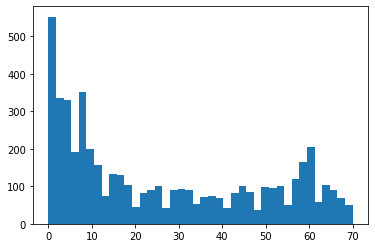

In [27]:
import matplotlib.pyplot as plt

plt.hist(new_data[new_data["price_change_perf"] < -30]["last_variance"].values, bins=40)

In [28]:
## Adjust growth rate
new_data["last_adjust_growth"].describe()

count    2.375700e+04
mean    -5.183071e+02
std      1.676715e+04
min     -1.879822e+06
25%     -2.136000e+02
50%      1.000000e-01
75%      9.200000e+00
max      1.677701e+05
Name: last_adjust_growth, dtype: float64

(array([  44.,   37.,   45.,   45.,   47.,   41.,   43.,   49.,   52.,
          51.,   58.,   62.,   56.,   61.,   73.,   64.,   58.,   73.,
          71.,   79.,   95.,   95.,   76.,   87.,   62., 2894., 1123.,
         774.,  554.,  498.,  413.,  348.,  309.,  276.,  212.,  206.,
         188.,  194.,  168.,  155.,  126.,  135.,  101.,  122.,  123.,
          98.,   95.,  100.,   80.,   84.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

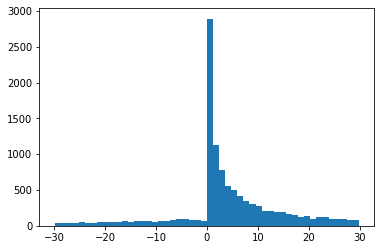

In [29]:
import matplotlib.pyplot as plt

plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
]["last_adjust_growth"].values, bins=50)

(array([  20.,   19.,   26.,   19.,   23.,   23.,   33.,   32.,   18.,
          24.,   29.,   32.,   31.,   37.,   40.,   45.,   30.,   45.,
          32.,   50.,   45.,   51.,   38.,   57.,   36., 1670.,  675.,
         438.,  309.,  292.,  234.,  199.,  170.,  171.,  112.,  116.,
          94.,  113.,  101.,   86.,   51.,   66.,   56.,   68.,   72.,
          46.,   51.,   58.,   43.,   43.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

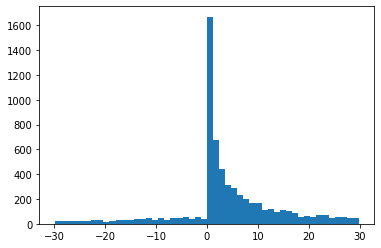

In [30]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == 1)
]["last_adjust_growth"].values, bins=50)

(array([  24.,   18.,   19.,   26.,   24.,   18.,   10.,   17.,   34.,
          27.,   29.,   30.,   25.,   24.,   33.,   19.,   28.,   28.,
          39.,   29.,   50.,   44.,   38.,   30.,   26., 1224.,  448.,
         336.,  245.,  206.,  179.,  149.,  139.,  105.,  100.,   90.,
          94.,   81.,   67.,   69.,   75.,   69.,   45.,   54.,   51.,
          52.,   44.,   42.,   37.,   41.]),
 array([-29.9  , -28.704, -27.508, -26.312, -25.116, -23.92 , -22.724,
        -21.528, -20.332, -19.136, -17.94 , -16.744, -15.548, -14.352,
        -13.156, -11.96 , -10.764,  -9.568,  -8.372,  -7.176,  -5.98 ,
         -4.784,  -3.588,  -2.392,  -1.196,   0.   ,   1.196,   2.392,
          3.588,   4.784,   5.98 ,   7.176,   8.372,   9.568,  10.764,
         11.96 ,  13.156,  14.352,  15.548,  16.744,  17.94 ,  19.136,
         20.332,  21.528,  22.724,  23.92 ,  25.116,  26.312,  27.508,
         28.704,  29.9  ]),
 <a list of 50 Patch objects>)

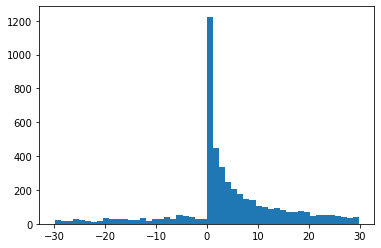

In [31]:
plt.hist(new_data[
     (new_data["last_adjust_growth"] > -30)
    & (new_data["last_adjust_growth"] < 30)
    & (new_data["direction"] == -1)
]["last_adjust_growth"].values, bins=50)

In [101]:
import numpy as np
import pandas as pd

In [102]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [ ]:
"""
last_market_dcf
market_dcf_to_price
last_growth_rate
dcf_to_price
last_adjust_growth
last_dcf
adjusted_dcf_to_price
In [ ]:
"""

In [53]:


features = [ "last_market_dcf",
                         "market_dcf_to_price", "last_growth_rate", 
                           "dcf_to_price", "last_adjust_growth", "last_dcf" , "adjusted_dcf_to_price"
           ]

X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 

In [32]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
# !pip3 install sklearn

In [34]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [35]:
# !pip3 install matplotlib

(array([7.833e+03, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ -100.,  2400.,  4900.,  7400.,  9900., 12400., 14900., 17400.,
        19900., 22400., 24900., 27400., 29900., 32400., 34900., 37400.,
        39900., 42400., 44900., 47400., 49900., 52400., 54900., 57400.,
        59900., 62400., 64900., 67400., 69900., 72400., 74900., 77400.,
        79900., 82400., 84900., 87400., 89900., 92400., 94900., 97400.,
        99900.]),
 <a list of 40 Patch objects>)

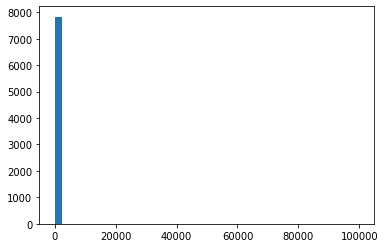

In [36]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=40)

In [40]:
filtered_outliner = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [41]:


X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 45.,  48.,  41.,  52.,  90.,  89., 112., 112., 133., 143., 159.,
        169., 212., 236., 229., 278., 298., 343., 379., 433., 443., 444.,
        400., 336., 324., 295., 233., 229., 188., 143., 124., 119.,  93.,
         86.,  74.,  64.,  46.,  46.,  36.,  20.]),
 array([-99.9993802 , -95.00608466, -90.01278911, -85.01949357,
        -80.02619803, -75.03290249, -70.03960695, -65.04631141,
        -60.05301586, -55.05972032, -50.06642478, -45.07312924,
        -40.0798337 , -35.08653815, -30.09324261, -25.09994707,
        -20.10665153, -15.11335599, -10.12006045,  -5.1267649 ,
         -0.13346936,   4.85982618,   9.85312172,  14.84641726,
         19.8397128 ,  24.83300835,  29.82630389,  34.81959943,
         39.81289497,  44.80619051,  49.79948605,  54.7927816 ,
         59.78607714,  64.77937268,  69.77266822,  74.76596376,
         79.7592593 ,  84.75255485,  89.74585039,  94.73914593,
         99.73244147]),
 <a list of 40 Patch objects>)

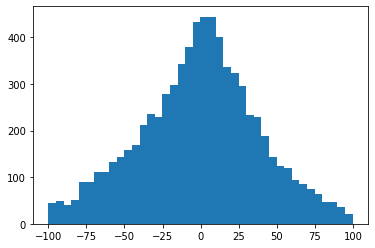

In [42]:
plt.hist(y_test, bins=40)

(array([ 144.,  130.,  139.,  190.,  245.,  289.,  340.,  350.,  399.,
         419.,  471.,  532.,  651.,  689.,  737.,  845.,  977., 1013.,
        1162., 1222., 1336., 1245., 1263., 1112.,  977.,  865.,  727.,
         611.,  568.,  466.,  378.,  322.,  302.,  246.,  191.,  178.,
         174.,  142.,  107.,   99.]),
 array([-9.99993802e+01, -9.49998586e+01, -9.00003370e+01, -8.50008154e+01,
        -8.00012939e+01, -7.50017723e+01, -7.00022507e+01, -6.50027291e+01,
        -6.00032075e+01, -5.50036859e+01, -5.00041643e+01, -4.50046428e+01,
        -4.00051212e+01, -3.50055996e+01, -3.00060780e+01, -2.50065564e+01,
        -2.00070348e+01, -1.50075133e+01, -1.00079917e+01, -5.00847009e+00,
        -8.94850067e-03,  4.99057308e+00,  9.99009467e+00,  1.49896163e+01,
         1.99891378e+01,  2.49886594e+01,  2.99881810e+01,  3.49877026e+01,
         3.99872242e+01,  4.49867458e+01,  4.99862673e+01,  5.49857889e+01,
         5.99853105e+01,  6.49848321e+01,  6.99843537e+01,  7.49838753

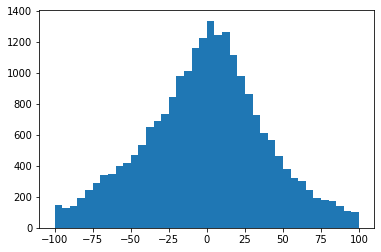

In [43]:
plt.hist(Y, bins=40)

In [44]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred = model.predict(X_test)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 4.000e+00, 5.000e+00, 5.000e+00, 9.000e+00,
        1.000e+01, 1.500e+01, 2.300e+01, 3.400e+01, 5.100e+01, 6.700e+01,
        1.010e+02, 1.360e+02, 1.880e+02, 1.980e+02, 2.440e+02, 3.190e+02,
        4.200e+02, 4.730e+02, 5.800e+02, 8.000e+02, 1.127e+03, 1.264e+03,
        7.330e+02, 2.580e+02, 1.230e+02, 6.600e+01, 4.400e+01, 2.100e+01,
        9.000e+00, 3.000e+00, 4.000e+00, 5.000e+00]),
 array([-103.979294 , -100.151764 ,  -96.324234 ,  -92.496704 ,
         -88.669174 ,  -84.841644 ,  -81.014114 ,  -77.18658  ,
         -73.35905  ,  -69.53152  ,  -65.70399  ,  -61.876457 ,
         -58.048927 ,  -54.221397 ,  -50.393867 ,  -46.566338 ,
         -42.738808 ,  -38.911274 ,  -35.083744 ,  -31.256214 ,
         -27.428684 ,  -23.601154 ,  -19.773623 ,  -15.946093 ,
         -12.118563 ,   -8.291032 ,   -4.4635015,   -0.6359709,
           3.1915596,    7.01909  ,   10.846621 ,   14

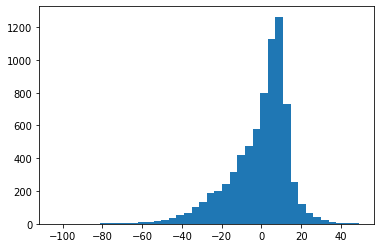

In [46]:
plt.hist(y_pred, bins=40)

In [47]:
# plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
# plt.plot(range(y_test.shape[0]), y_test, 'g-')
# plt.show()

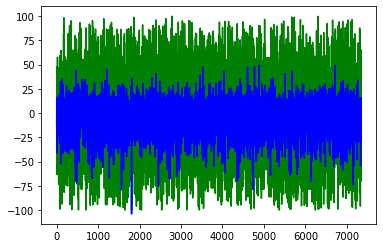

In [48]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [49]:
accuracy = accuracy_score(y_test >= 25, y_pred >= 25)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.77%


In [50]:
accuracy = accuracy_score(y_test >= 35, y_pred >= 35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.71%


In [51]:
accuracy = accuracy_score(y_test < -20, y_pred < -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.81%


In [52]:
accuracy = accuracy_score(y_test < -40, y_pred < -40)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.31%


['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price', 'last_variance', 'last_adjust_growth', 'last_adjusted_dcf', 'adjusted_dcf_to_price']


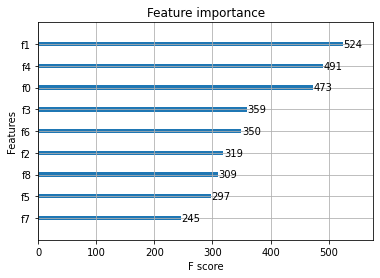

In [144]:
# # plot feature importance using built-in function
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot
# # load data
# X = data[features].values
# Y = data['direction'].values
# # fit model no training data
# model = XGBClassifier()
# model.fit(X, Y)
# # plot feature importance
# plot_importance(model)
# print (features)
# pyplot.show()

In [243]:
for index in [1,4,0,3,6]:
    print (features[index])

last_market_dcf
market_dcf_to_price
last_growth_rate
dcf_to_price
last_adjust_growth


In [145]:
data.to_csv("make_dcf_model_0615_3rankings.csv")

In [146]:
import pickle, simplejson

In [155]:
from mapper.predict_logic_mapper import MapperPredictLogic, simplejson

In [156]:
logic_mapper = MapperPredictLogic(db)

In [177]:


dto = logic_mapper.get_dto(
name="dcf_adj",
features=simplejson.dumps(features),
logic=pickle.dumps(model)
    
)

In [178]:
logic_mapper.insert(dto, update_on_conflict="name")

insert ExecutionResults(query_data=None, row_count=0)
update where name
update UPDATE model.predict_logic SET name = %s, features = %s, logic = %s WHERE name = %s RETURNING id, name, features, logic, created ('dcf_adj', '["last_growth_rate", "last_market_dcf", "last_dcf", "dcf_to_price", "market_dcf_to_price", "last_variance", "last_adjust_growth", "last_adjusted_dcf", "adjusted_dcf_to_price"]', b'\x80\x03cxgboost.sklearn\nXGBRegressor\nq\x00)\x81q\x01}q\x02(X\x0c\x00\x00\x00n_estimatorsq\x03KdX\t\x00\x00\x00objectiveq\x04X\x10\x00\x00\x00reg:squarederrorq\x05X\t\x00\x00\x00max_depthq\x06NX\r\x00\x00\x00learning_rateq\x07NX\t\x00\x00\x00verbosityq\x08NX\x07\x00\x00\x00boosterq\tNX\x0b\x00\x00\x00tree_methodq\nNX\x05\x00\x00\x00gammaq\x0bNX\x10\x00\x00\x00min_child_weightq\x0cNX\x0e\x00\x00\x00max_delta_stepq\rNX\t\x00\x00\x00subsampleq\x0eNX\x10\x00\x00\x00colsample_bytreeq\x0fNX\x11\x00\x00\x00colsample_bylevelq\x10NX\x10\x00\x00\x00colsample_bynodeq\x11NX\t\x00\x00\x00reg_alphaq\x12N

< DtoPredictLogic, {'id': 7, 'name': 'dcf_adj', 'features': ['last_growth_rate', 'last_market_dcf', 'last_dcf', 'dcf_to_price', 'market_dcf_to_price', 'last_variance', 'last_adjust_growth', 'last_adjusted_dcf', 'adjusted_dcf_to_price'], 'logic': <memory at 0x13ceaa1c8>, 'created': datetime.datetime(2020, 6, 15, 16, 40, 13, 882629)} >

In [203]:
merton_model = logic_mapper.get_active_session("merton_data").logic

In [238]:
sql = """

select 
symbol, pricingdate, current_price,
round(current_growth_rate, 3) * 100 as growth_rate, 
        round(market_dcf, 2) as market_dcf, 
        round(dcf, 2) normal_dcf,   
        round((dcf - current_price) * 100 / current_price, 2) as dct_to_price,
        round((market_dcf - current_price) * 100 / current_price, 2) as market_to_price,
        round(variance, 2) * 100 as variance,
        round(adjusted_growth_rate, 3) * 100 as adjusted_growth,
        round(adjusted_dcf, 2) as adjusted_dcf,
        round((adjusted_dcf - current_price) * 100 / current_price, 2) as adjusted_dcf_to_price
        
        
            from model.dcf_values 
                where total_years = 5
                and fiscal_year = 2018  
                and is_active = 1
                and current_price > 0.5
"""
pred_data = db.fetch_all_rows(sql)

In [239]:
pred_results = []

for row in pred_data.query_data:
    
    symbol = row[0]
    pricing_date = row[1]
    last_price = row.current_price
    pred_X = list(row[3:])
   
    pred_value = logic_mapper.predict("dcf_adj", pred_X)
    pred_results.append([symbol,last_price, pricing_date, pred_value])
    

In [240]:
for row in sorted(pred_results, key=lambda d:d[3], reverse=True)[0:50]:
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((recent_price- row[1])*100/ row[1], 2)))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

['CMG', 431.79, datetime.datetime(2018, 12, 31, 0, 0), 50.987286]
last_price: 431.79, most_recent_price: 991.83, gain 129.7%
Merton: 9.967736989 0.0 
['JYNT', 8.32, datetime.datetime(2018, 12, 31, 0, 0), 49.851795]
last_price: 8.32, most_recent_price: 16.27, gain 95.55%
Merton: 5.161434617 0.0 
['CYTK', 6.32, datetime.datetime(2018, 12, 31, 0, 0), 46.81083]
last_price: 6.32, most_recent_price: 21.38, gain 238.29%
Merton: 3.826299003 0.0 
['EGF', 12.98, datetime.datetime(2018, 12, 31, 0, 0), 46.50302]
last_price: 12.98, most_recent_price: 13.2, gain 1.69%
Merton: 14.86066278 0.0 
['CDE', 4.47, datetime.datetime(2018, 12, 31, 0, 0), 44.673298]
last_price: 4.47, most_recent_price: 4.92, gain 10.07%
Merton: 2.052921963 0.02 
['NM', 2.74, datetime.datetime(2018, 12, 31, 0, 0), 44.17455]
last_price: 2.74, most_recent_price: 2.05, gain -25.18%
Merton: -3.34138961 1.0 B
['CCS', 17.26, datetime.datetime(2018, 12, 31, 0, 0), 43.323257]
last_price: 17.26, most_recent_price: 29.96, gain 73.58%
Mer

In [241]:
for row in sorted(pred_results, key=lambda d:d[3], reverse=False)[0:50]:
    print( "*" * 30)
    print (row)
    recent_price = get_current_price(row[0])
    if recent_price:
        print ("last_price: {}, most_recent_price: {}, gain {}%".format(row[1], 
                                                                       recent_price,
                                        round((row[1] - recent_price)*100/ row[1], 2)))
    merton = merton_model.get(row[0])
    if merton:
        print("Merton: {} {} {}".format(merton["dd"],
                                         round(float(merton["pd"]), 2),
                                           merton["snp_rating"]))

******************************
['DCTH', 196.079803, datetime.datetime(2018, 12, 31, 0, 0), -76.34972]
last_price: 196.079803, most_recent_price: 7.7857, gain 96.03%
******************************
['CDIX.D', 13493.253373, datetime.datetime(2018, 12, 31, 0, 0), -71.27338]
******************************
['DLOC', 2.925029, datetime.datetime(2018, 12, 31, 0, 0), -69.38544]
last_price: 2.925029, most_recent_price: 0.0042, gain 99.86%
******************************
['AGTX', 10.5, datetime.datetime(2018, 12, 31, 0, 0), -67.81128]
******************************
['GOVX', 24000.0, datetime.datetime(2018, 12, 31, 0, 0), -61.821735]
last_price: 24000.0, most_recent_price: 0.31913, gain 100.0%
******************************
['HEPA', 19.740019, datetime.datetime(2018, 12, 31, 0, 0), -58.62984]
last_price: 19.740019, most_recent_price: 2.1, gain 89.36%
Merton: -9.006656774 1.0 N/A
******************************
['LPCN', 1.3, datetime.datetime(2018, 12, 31, 0, 0), -54.755917]
last_price: 1.3, most_rece

In [213]:
snpdb = PgsqlExecutor(snpsource)

In [214]:
item_dict = {}
sql = """

select tradingitemid, tickersymbol from v2mv_sbt_company where  
is_primary_exchange = true and exchangesymbol not ilike 'mutualfund'
    and securityname ilike 'common%stock' 
             and exchangecountry = 'USA'
"""

data = snpdb.fetch_all_rows(sql)
for row in data.query_data:
    item_dict[row.tickersymbol.upper()] = row

In [227]:
def get_current_price(symbol):
    sql = """
    SELECT  priceclose
	    FROM public.v_price_timeseries 
	        WHERE tradingitemid = %s 
	        AND pricingdate >= now()::Date -3
            
            order by pricingdate desc limit 1
    
    """
    try:
        rv = snpdb.fetch_one_row(sql, args=[item_dict[symbol.upper()].tradingitemid])
        if rv.row_count > 0:
            return rv.query_data.priceclose
    except:
        return None